In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/cardio_train.csv', sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.shape

(70000, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


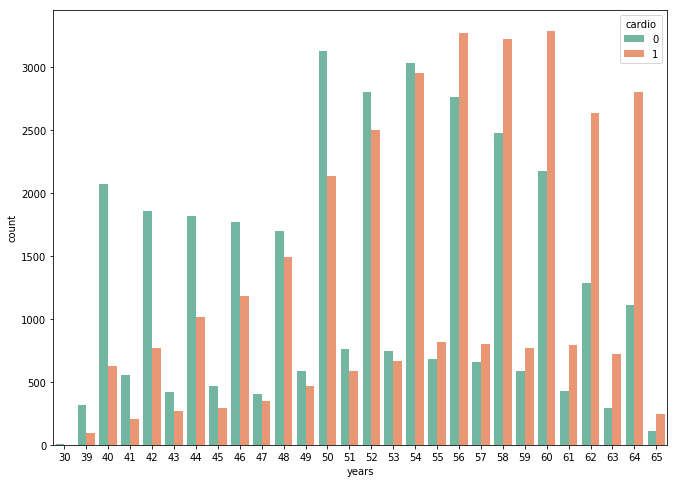

In [6]:
plt.figure(figsize=(11, 8))
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years',hue='cardio', data=df, palette='Set2')

In [7]:
df_categorical = df.loc[:, ['cholesterol', 'gluc', 'smoke', 'alco', 'active']]
df_categorical.head()

,cholesterol,gluc,smoke,alco,active
0,1,1,0,0,1
1,3,1,0,0,1
2,3,1,0,0,0
3,1,1,0,0,1
4,1,1,0,0,0


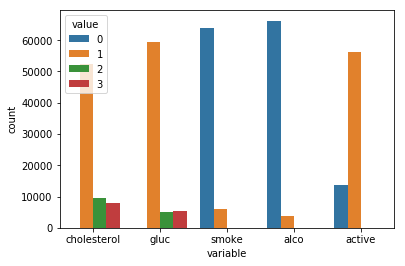

In [8]:
sns.countplot(x='variable', hue='value', data=pd.melt(df_categorical))

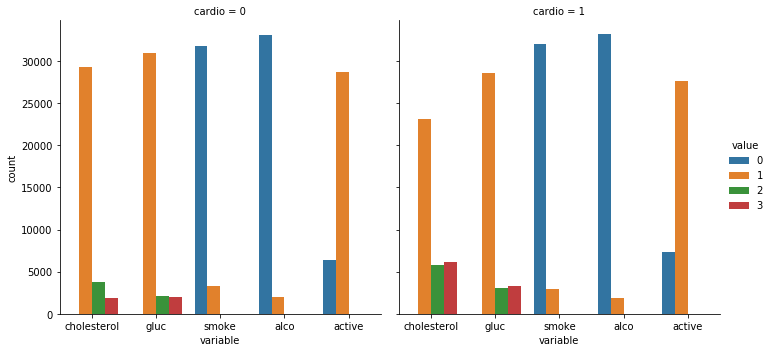

In [9]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'])
sns.catplot(x='variable', hue='value', col='cardio', data=df_long, kind='count')

In [10]:
df_long.head()

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,3
2,1,cholesterol,3
3,1,cholesterol,1
4,0,cholesterol,1


In [11]:
df_long.tail()

,cardio,variable,value
349995,0,active,1
349996,1,active,1
349997,1,active,0
349998,1,active,0
349999,0,active,1


In [12]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

In [13]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [14]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

In [15]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [16]:
pd.crosstab(df['cardio'], df['gender'], normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


In [17]:
df.isnull().values.any()

False

In [18]:
df['height'].sort_values().head()

22723    55
66643    57
64115    59
29157    60
27603    64
Name: height, dtype: int64

In [19]:
df['weight'].sort_values().head()

57858    10.0
33817    11.0
60188    21.0
29488    22.0
26806    23.0
Name: weight, dtype: float64

In [20]:
df['height'].sort_values(ascending=False).head()

6486     250
21628    207
41901    200
8897     198
40090    198
Name: height, dtype: int64

In [21]:
df['weight'].sort_values(ascending=False).head()

435      200.0
50413    200.0
61285    183.0
36780    181.0
61362    180.0
Name: weight, dtype: float64

In [22]:
df['age'].sort_values(ascending=False).head()

57191    23713
68005    23701
50714    23692
20931    23690
36603    23687
Name: age, dtype: int64

In [23]:
df['age'].sort_values().head()

22343    10798
30666    10859
6219     10878
55905    10964
31762    14275
Name: age, dtype: int64

In [24]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index, inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index, inplace=True)

In [25]:
print(f"Diastolic pressure is higher than the Systolic pressure {df[df['ap_lo'] > df['ap_hi']].shape[0]} cases")

Diastolic pressure is higher than the Systolic pressure 1082 cases


In [26]:
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index, inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index, inplace=True)

0

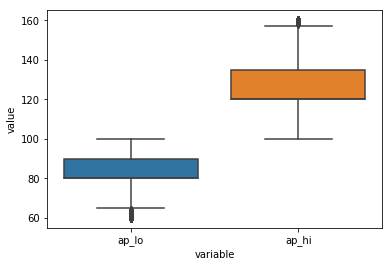

In [27]:
blood_pressure = df.loc[:, ['ap_lo', 'ap_hi']]
sns.boxplot(x='variable', y='value', data=blood_pressure.melt())
df[df['ap_lo'] > df['ap_hi']].shape[0]

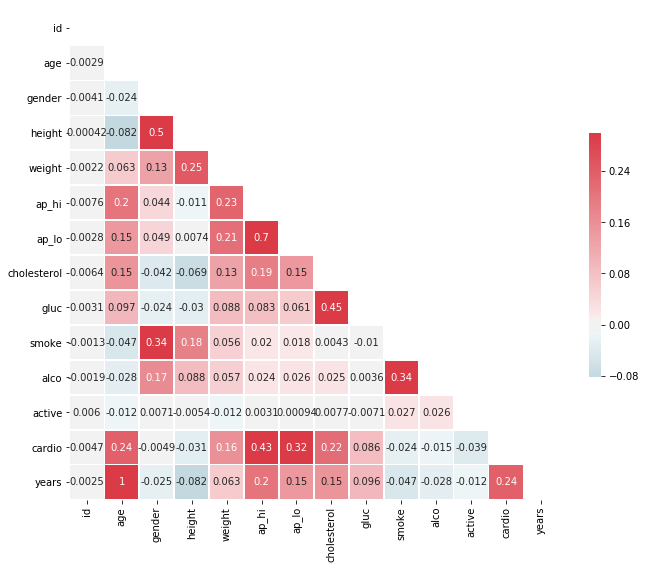

In [28]:
import numpy as np
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, square=True, vmax=.3, center=0, linewidths=.5, cbar_kws={"shrink": .5})

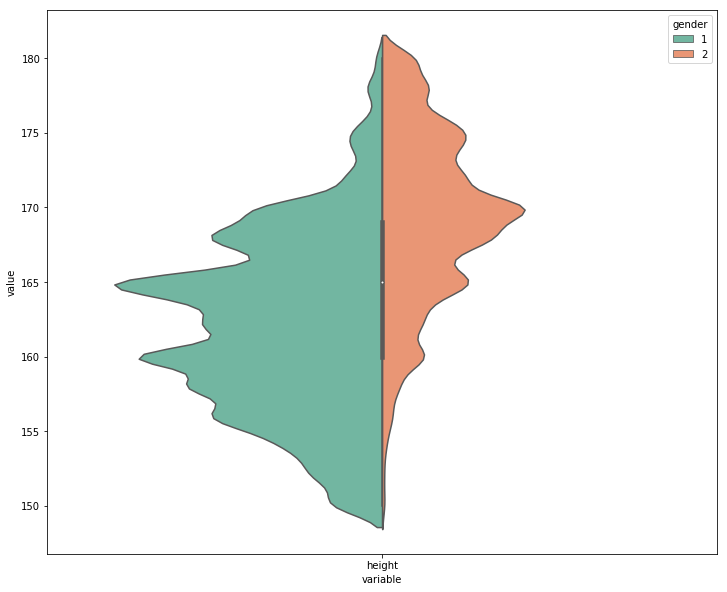

In [29]:
df_melt = pd.melt(df, id_vars=['gender'], value_vars=['height'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(x='variable', y='value', hue='gender', split=True, data=df_melt, scale='count', scale_hue=False,
                    palette='Set2')

In [30]:
df['bmi'] = (df['weight'] / (df['height']/100)**2)
df.groupby('cardio')['bmi'].mean()

cardio
0    26.430521
1    27.945719
Name: bmi, dtype: float64

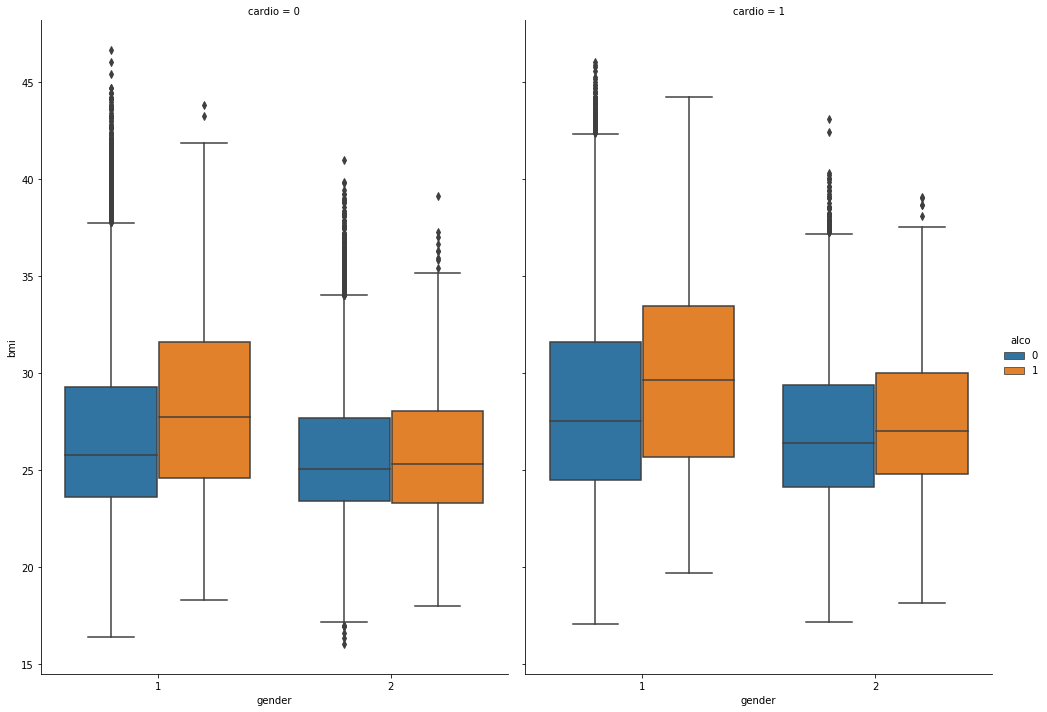

In [31]:
sns.catplot(x='gender', y='bmi', hue='alco', col='cardio', data=df, kind='box', height=10, aspect=.7)

In [32]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177


In [33]:
X = df.drop(['id', 'age', 'height', 'weight', 'cardio'], axis=1)
X.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,years,bmi
0,2,110,80,1,1,0,0,1,50,21.967120
1,1,140,90,3,1,0,0,1,55,34.927679
2,1,130,70,3,1,0,0,0,52,23.507805
3,2,150,100,1,1,0,0,1,48,28.710479
4,1,100,60,1,1,0,0,0,48,23.011177


In [34]:
y = df['cardio']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: cardio, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
cross_val_score(SVC(), X_train, y_train, cv=3)

In [63]:
cross_val_score(RandomForestClassifier(), X_train, y_train, cv=3)

array([0.67750948, 0.67923901, 0.67770904])

In [64]:
cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=3)

array([0.63254174, 0.63467039, 0.6274862 ])

In [37]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [39]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.7158917049158517

Text(83.40000000000006, 0.5, 'predicted values')

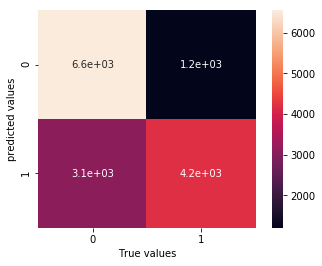

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True)
plt.xlabel('True values')
plt.ylabel('predicted values')